In [7]:
%reload_kedro

2019-10-06 20:59:11,008 - root - ERROR - Kedro's ipython session startup script failed:
Could not retrive 'context_path' from '.kedro.yml' in /home/madjuice/Documents/Python/digital-reputation-challenge/notebooks. If you have created your project with Kedro version <0.15.0, make sure to update your project template. See https://github.com/quantumblacklabs/kedro/blob/master/RELEASE.md for how to migrate your Kedro project.


KedroContextError: Could not retrive 'context_path' from '.kedro.yml' in /home/madjuice/Documents/Python/digital-reputation-challenge/notebooks. If you have created your project with Kedro version <0.15.0, make sure to update your project template. See https://github.com/quantumblacklabs/kedro/blob/master/RELEASE.md for how to migrate your Kedro project.

In [6]:
import kedro.contrib.io as ked

In [45]:
import pandas as pd
import numpy as np
from digital_reputation_challenge.nodes.datatransform import get_cols
pd.set_option('max_rows',100)
pd.set_option('max_columns',100)

In [10]:
from digital_reputation_challenge.io.matplotlib_io import MatplotlibWriter

from kedro.config import ConfigLoader

conf_paths = ['conf/base', 'conf/local']
conf_loader = ConfigLoader(conf_paths)
conf_parameters = conf_loader.get('parameters*', 'parameters*/**')
conf_catalog = conf_loader.get('catalog*', 'catalog*/**')

In [14]:
conf_catalog['shap_reg']

{'type': 'digital_reputation_challenge.io.matplotlib_io.MatplotlibWriter',
 'filepath': 'data/08_reporting/shap_reg.npg',
 'save_args': {'bbox_inches': 'tight'}}

In [32]:
X1 = context.catalog.load('X1_train')
X2 = context.catalog.load('X2_train')
X3 = context.catalog.load('X3_train')
Y = context.catalog.load('Y_train')

X1 = X1.set_index('id')
X3 = X3.set_index('id')
X1.columns = ['X1_'+i for i in X1.columns]
X3.columns = ['X3_'+i for i in X3.columns]
Y.columns = ['Y_'+i for i in Y.columns]

2019-10-05 21:30:06,046 - kedro.io.data_catalog - INFO - Loading data from `X1_train` (CSVLocalDataSet)...
2019-10-05 21:30:06,071 - kedro.io.data_catalog - INFO - Loading data from `X2_train` (CSVLocalDataSet)...
2019-10-05 21:30:06,138 - kedro.io.data_catalog - INFO - Loading data from `X3_train` (CSVLocalDataSet)...
2019-10-05 21:30:06,292 - kedro.io.data_catalog - INFO - Loading data from `Y_train` (CSVLocalDataSet)...


In [42]:
df_test = context.catalog.load('df_test')

2019-10-05 21:33:33,338 - kedro.io.data_catalog - INFO - Loading data from `df_test` (PickleLocalDataSet)...


In [44]:
cv_models["Y_1"].transform_test(df_test)

2019-10-05 21:34:08,085 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


,PREDICT
id,
0,0.304391
1,0.304123
2,0.308286
4,0.300111
7,0.305304
...,...
8046,0.297349
8047,0.300386
8050,0.287843


In [54]:

cols_all, _ = get_cols(df_test)

results=pd.DataFrame(index=df_test.index)

In [51]:
cv_score.transform_test(df_test=df_test)

NameError: name 'cv_score' is not defined

In [56]:

for col in col_target:
#     cv_score = cv_models[col]
#     results[col] = cv_score.transform_test(df_test=df_test)
    pass

In [58]:
col_target

[]

In [49]:
cv_models = context.catalog.load('cv_models')

2019-10-05 21:35:30,718 - kedro.io.data_catalog - INFO - Loading data from `cv_models` (PickleLocalDataSet)...


In [41]:
cv_models["Y_2"].num_boost_optimal

13

In [59]:
cv_test = context.catalog.load('cv_test')

2019-10-05 21:42:50,876 - kedro.io.data_catalog - INFO - Loading data from `cv_test` (PickleLocalDataSet)...


,id,Y_1,Y_2,Y_3,Y_4,Y_5
0,0,0.304391,0.340627,0.332281,0.309958,0.352225
1,1,0.304123,0.336372,0.332285,0.315641,0.354743
2,2,0.308286,0.341485,0.329091,0.311717,0.355393
3,4,0.300111,0.341682,0.330892,0.311577,0.350050
4,7,0.305304,0.336085,0.334841,0.318091,0.354023
...,...,...,...,...,...,...
4053,8046,0.297349,0.339223,0.337624,0.314048,0.352533
4054,8047,0.300386,0.343927,0.333527,0.321696,0.351075
4055,8050,0.287843,0.339453,0.332581,0.315042,0.350115
4056,8054,0.295436,0.341605,0.334613,0.323446,0.353269


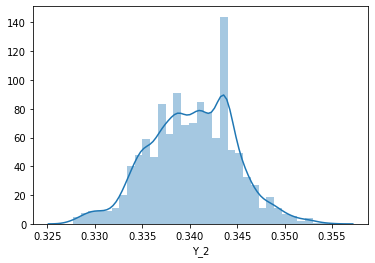

In [38]:
import seaborn as sns

sns.distplot(cv_oof["Y_2"])

In [23]:
a.num_boost_optimal

39

In [19]:
X1['id'].value_counts()

6141    1
4783    1
2760    1
2756    1
6850    1
       ..
5436    1
3387    1
1338    1
7481    1
4098    1
Name: id, Length: 4000, dtype: int64

In [ ]:
X1['1'].value_counts()

In [14]:
X3

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452
0,3,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.022222,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.022222,0.000000,0.088889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.022222,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.066667,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.022222,0.0,0.0,0.0,0.000000
1,5,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.079208,0.0,0.000000,0.0,0.0,0.019802,0.000000,0.0,0.00000,0.019802,0.0,0.0,0.000000,0.000000,0.009901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.029703,0.0,0.0,0.0,0.000000
2,6,0.00000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.222222,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.222222,0.0,0.0,0.0,0.111111
3,8,0.00000,0.0,0.020000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.02,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.040000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.020000,0.000000,0.0,0.060000,0.0,0.0,0.0,0.000000
4,10,0.00000,0.0,0.000000,0.0,0.055556,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,8051,0.00000,0.0,0.050000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.050000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0000